## Principal Component Analysis

This notebook is based upon the data presented [`here`](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

First load the packages required

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.utils.extmath import svd_flip
from sklearn.decomposition import PCA
plt.style.use('seaborn-v0_8-whitegrid')

First define a helper function which plots the direction of the principal components

In [14]:
def draw_vector(v0, v1, ax=None):
    """Helper function to plot principal component directions"""
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

Create random data, $X$, using 200 samples and 2 features. Using the same seed as the source document

In [15]:
n_samples: int = 200
n_features: int = 2
rng = np.random.RandomState(1)
X = np.dot(rng.rand(n_features, n_features), rng.randn(n_features, n_samples)).T

plot data

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

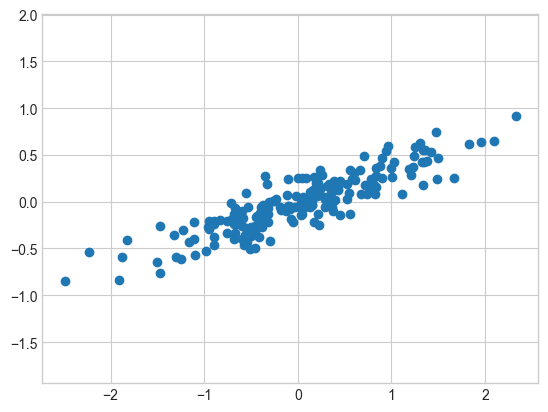

In [16]:
fig0, ax0 = plt.subplots(1, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Perform PCA extracting all the components, i.e. `n_components = n_features`

In [17]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

plot the data

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

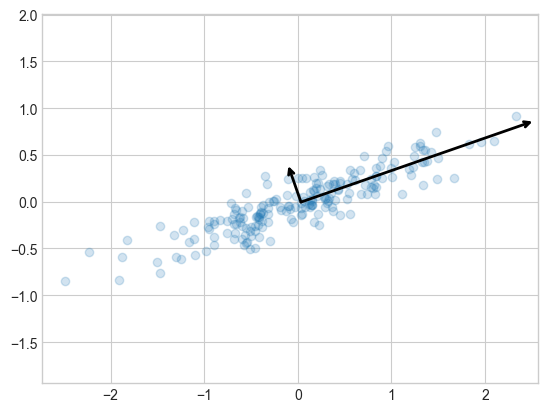

In [18]:
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
ax1.axis('equal')

It is possible to unpack the steps performed by scipy. First centre the data

In [19]:
mean_ = np.mean(X, axis=0)
Z = (X - mean_)

Perform the singular value decomposition

In [20]:
U, s, Vt = scipy.linalg.svd(Z, full_matrices=False)

flip the signs of the eigenvectors to enforce consistent output

In [21]:
U, Vt = svd_flip(U, Vt, u_based_decision=False)

Check data is same as scipy routine and plot


mean: [ 0.03351168 -0.00408072] [ 0.03351168 -0.00408072]

variance: [0.7625315 0.0184779] [0.7625315 0.0184779]

components: [[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]] [[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]
[ 0.03351168 -0.00408072] [2.50770626 0.85681689] 0.7625315008826112 [0.94446029 0.32862557]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044] 0.018477895513562565 [-0.32862557  0.94446029]


(-2.762782885920728, 2.53676275904173, -0.9285374399262483, 1.0084945478208098)

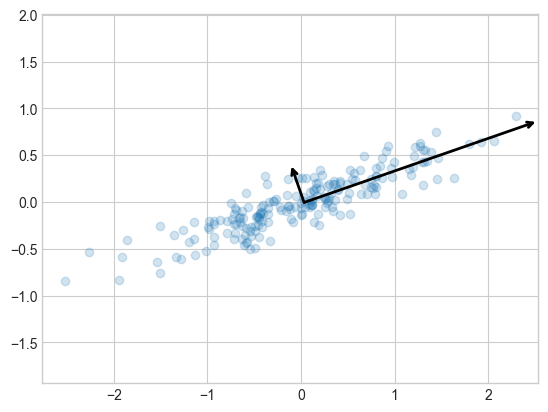

In [22]:
explained_variance_ = (s**2) / (n_samples - 1)
components_ = Vt

print("\nmean:", mean_, pca.mean_)
print("\nvariance:", explained_variance_, pca.explained_variance_)
print("\ncomponents:", components_, pca.components_)

fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(Z[:, 0], Z[:, 1], alpha=0.2)
for length, vector in zip(explained_variance_, components_):
    v = vector * 3.0 * np.sqrt(length)
    draw_vector(mean_, mean_ + v, ax=ax2)
ax2.axis('equal')